# Welcome to the Clustering Notebook Session 

This notebook presents a clustering analysis focused on segmenting students into distinct groups based on their academic or behavioral attributes. The primary objective is to identify students who may require more proactive interventions or support to improve their performance or overall experience

In [15]:
## All libraries used

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster import hierarchy as sch

import warnings
warnings.simplefilter(action= 'ignore')

In [16]:
# Load the client data

df = pd.read_csv(r'/Users/sot/SDS-CP029-social-sphere/submissions/team-members/blake-lawall/data/Students Social Media Addiction.csv')

In [17]:
df

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,701,20,Female,Undergraduate,Italy,4.7,TikTok,No,7.2,7,In Relationship,2,5
701,702,23,Male,Graduate,Russia,6.8,Instagram,Yes,5.9,4,Single,5,9
702,703,21,Female,Undergraduate,China,5.6,WeChat,Yes,6.7,6,In Relationship,3,7
703,704,24,Male,Graduate,Japan,4.3,Twitter,No,7.5,8,Single,2,4


In [18]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [19]:
df.head()

,student_id,age,gender,academic_level,country,avg_daily_usage_hours,most_used_platform,affects_academic_performance,sleep_hours_per_night,mental_health_score,relationship_status,conflicts_over_social_media,addicted_score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


In [36]:
## Looking through both features 

data = df[[ 'addicted_score','sleep_hours_per_night']]


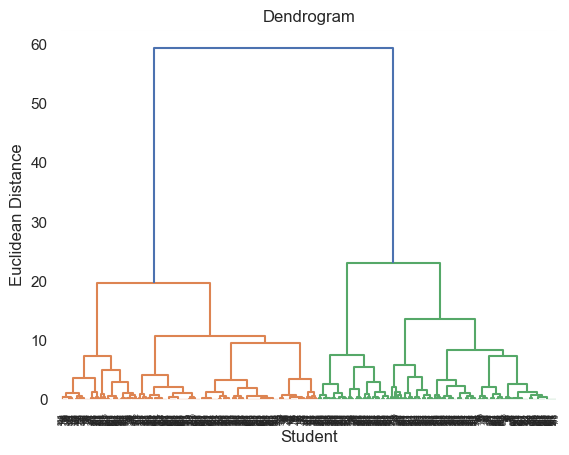

In [21]:
dendrogram = sch.dendrogram(sch.linkage(data,method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Student')
plt.ylabel('Euclidean Distance')
plt.show()

 The dendrogram above shows that the optimal number of clusters is 2 based on euclidean distance 

In [22]:
kmeans=  KMeans(2,init = 'k-means++',random_state=42)
y_kmeanss = kmeans.fit_predict(data)

In [23]:
y_kmeanss

array([1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,

In [24]:
data = data.values

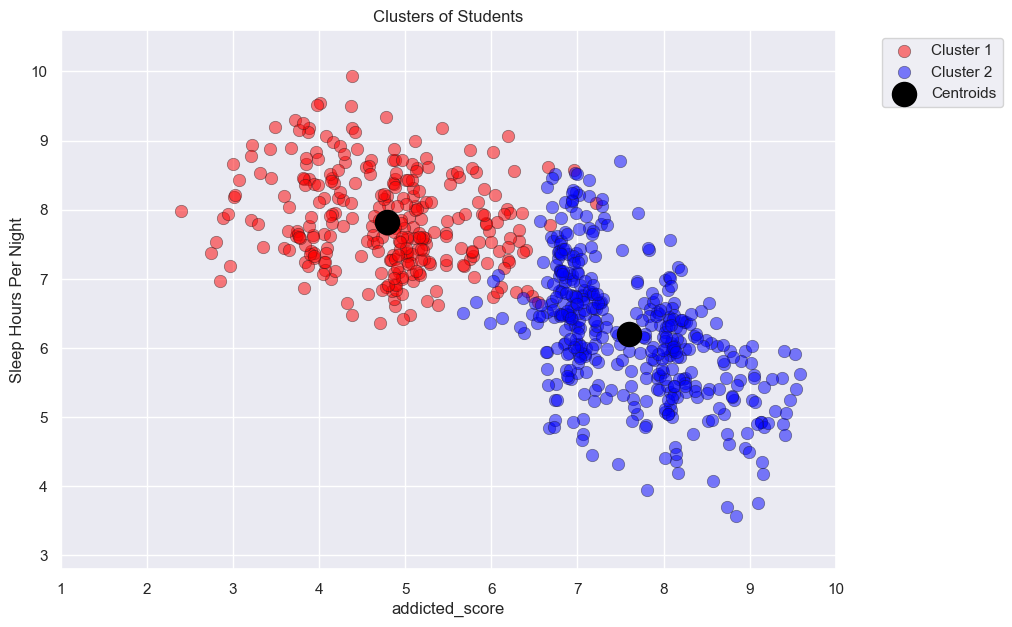

In [27]:
# Increase jitter strength
np.random.seed(42)
jitter_strength = 0.25 
x_jittered = data[:, 0] + np.random.normal(0, jitter_strength, size=len(data))
y_jittered = data[:, 1] + np.random.normal(0, jitter_strength, size=len(data))

plt.figure(figsize=(10, 7))

plt.scatter(x_jittered[y_kmeanss == 0], y_jittered[y_kmeanss == 0], s=80, alpha=0.5, c='red', label='Cluster 1', edgecolors='k', linewidth=0.5)
plt.scatter(x_jittered[y_kmeanss == 1], y_jittered[y_kmeanss == 1],s=80, alpha=0.5, c='blue', label='Cluster 2', edgecolors='k', linewidth=0.5)

# Centroids (no jitter)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],s=300, c='black', marker='o', label='Centroids')

plt.xlim(data[:, 0].min() - 1, data[:, 0].max() + 1)
plt.ylim(data[:, 1].min() - 1, data[:, 1].max() + 1)

plt.xlabel('addicted_score')
plt.ylabel('Sleep Hours Per Night')
plt.title('Clusters of Students')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

Based on the insights above, there appears to be a correlation between students' sleep patterns and their social media usage. Specifically, students who sleep early tend to be less addicted to social media, while those who sleep very late show higher levels of addiction. To deepen this analysis, I will perform further segmentation to identify the specific age groups most affected by this trend, which could help in designing targeted interventions.

In [37]:
## Looking through these features

data2 =df[[ 'sleep_hours_per_night','age']]

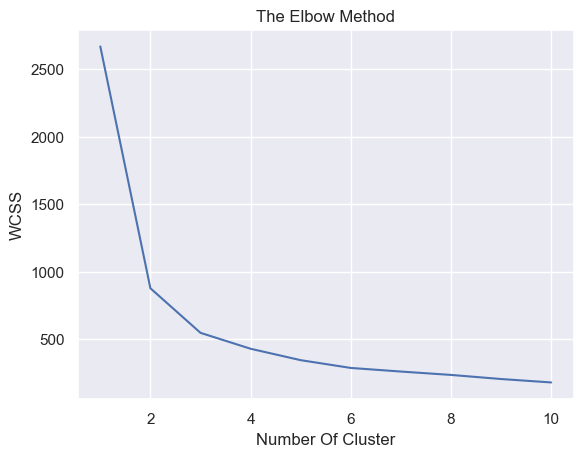

In [29]:
wcss = []

for i in range(1,11):
    kmeans=  KMeans(i,init = 'k-means++',random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number Of Cluster')
plt.ylabel('WCSS')
plt.show()


The optimal number of clusters from the elbow method above is either 2 or 3, i will go with 3

In [30]:
kmeans=  KMeans(3,init = 'k-means++',random_state=42)
y_kmeans = kmeans.fit_predict(data2)


In [31]:
y_kmeans

array([2, 1, 2, 0, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1,
       2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1,
       2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1,
       2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2,
       2, 1, 0, 1, 2, 0, 1, 2, 1, 2, 2, 1, 2, 1, 0, 1, 2, 0, 1, 2, 0, 2,
       1, 1, 2, 2, 1, 1, 2, 0, 1, 2, 0, 0, 1, 0, 0, 2, 1, 1, 2, 0, 1, 2,
       0, 0, 1, 0, 0, 2, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 2, 0, 1, 2, 1, 0, 1, 0, 1, 2, 1, 0, 2, 0, 1, 2, 1, 0, 1, 0, 0,
       2, 1, 0, 2, 0, 1, 2, 1, 0, 1, 0, 0, 2, 1, 0, 2, 0, 1, 2, 0, 0, 1,
       2, 1, 0, 1, 0, 1, 2, 1, 2, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1,
       2, 1, 2, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 2, 1, 2, 1, 0, 1,
       0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 2, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 2,

In [40]:
data2 = data2.values

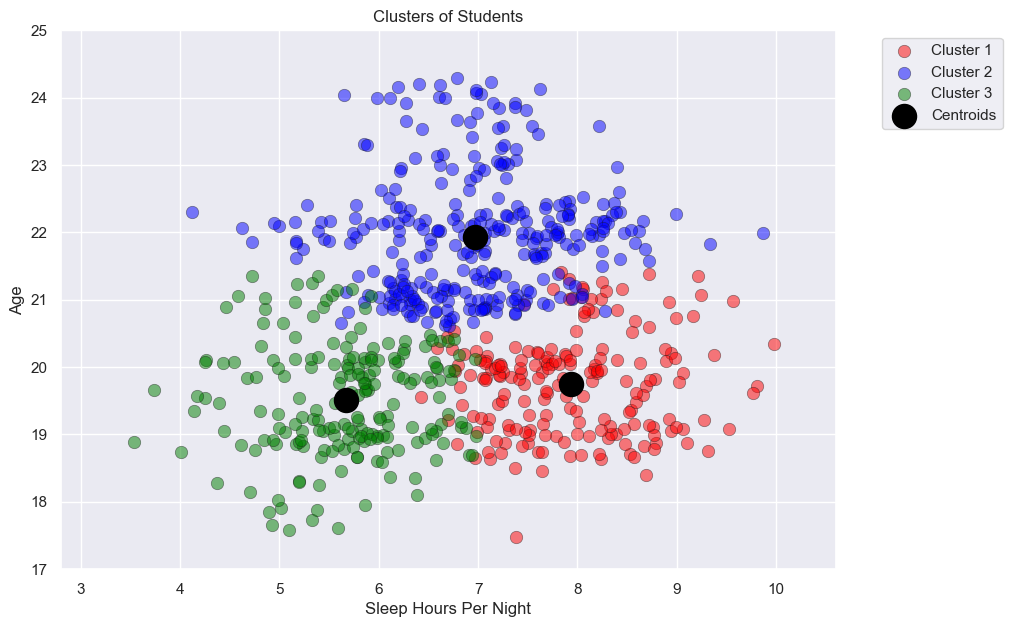

In [42]:
# Increase jitter strength
np.random.seed(42)
jitter_strength = 0.25
x_jittered = data2[:, 0] + np.random.normal(0, jitter_strength, size=len(data2))
y_jittered = data2[:, 1] + np.random.normal(0, jitter_strength, size=len(data2))

plt.figure(figsize=(10, 7))

colors = ['red', 'blue', 'green']
for i, color in enumerate(colors):
  plt.scatter(
      x_jittered[y_kmeans == i],
      y_jittered[y_kmeans == i],
      s=80,
      alpha=0.5,
      c=color,
      label=f'Cluster {i+1}',
      edgecolors='k',
      linewidth=0.5
  )

# Centroids
plt.scatter(
  kmeans.cluster_centers_[:, 0],
  kmeans.cluster_centers_[:, 1],
  s=300,
  c='black',
  marker='o',
  label='Centroids'
)

plt.xlim(data2[:, 0].min() - 1, data2[:, 0].max() + 1)
plt.ylim(data2[:, 1].min() - 1, data2[:, 1].max() + 1)

plt.xlabel('Sleep Hours Per Night')
plt.ylabel('Age')
plt.title('Clusters of Students')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


**Clustering Insights and Recommendations:**

From the clustering analysis:

Cluster 3 consists of students aged 17–21 who sleep for only 3–6 hours per day and show high levels of social media addiction.

Cluster 1, also aged 17–21, gets 7–10 hours of sleep and shows lower levels of social media addiction.

Cluster 2 includes students aged 22–25, with moderate sleep durations (5–9 hours) and varying levels of addiction.

**Insight:**
It is evident that Cluster 3 represents a high-risk group. Despite being in the same age range as Cluster 1, their reduced sleep and higher addiction levels suggest unhealthy digital habits that may impact academic performance, mental health, and overall well-being.

**Suggested Interventions for Educators:**

1. Educators can organize workshops or seminars on the effects of sleep deprivation and excessive social media use, particularly targeting students aged 17–21.

2. Introduce school or campus-wide initiatives that promote healthy screen time habits, including app timers, phone-free zones, or mindfulness sessions.

3. Offer access to counselors or peer mentors who can support students struggling with addiction or poor sleep routines.

4. Integrate lessons or short modules into the curriculum to teach students the importance of good sleep hygiene, such as consistent sleep schedules and reducing screen time before bed.

By focusing on Cluster 3, educators can implement proactive measures that help at-risk students develop healthier habits, which may ultimately improve both academic outcomes and personal well-being.



In [34]:

score = silhouette_score(data, y_kmeanss)
print(f"Silhouette Score: {score:.3f}")

Silhouette Score: 0.571


## Based on the score above, the  model found reasonable structure for my data.